In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
class logistic_reggression():
    def __init__ (self, learning_rate, no_of_iterations):
        self.l_rate=learning_rate
        self.n_iteration=no_of_iterations
        self.weights, self.bias = None, None
        
    def fit(self, x,y):
        self.m, self.n = x.shape
        
        self.weights=np.zeros(self.n)
        self.bias=0
        
        #Gradient Descent
        for i in range(self.n_iteration):
            z=np.dot(x, self.weights)+self.bias
            y_pred=sigmoid(z)
            
            
            dw=(1/self.m)*np.dot(x.T,(y_pred-y))
            db=(1/self.m)*np.sum(y_pred-y)
            
            
            self.weights=self.weights-self.l_rate*dw
            self.bias=self.bias-self.l_rate*db
            
        
    def predict(self,x):
        z=np.dot(x, self.weights)+self.bias
        y_pred=sigmoid(z)
        
        class_label=[1 if y>0.5 else 0 for y in y_pred]
        return class_label

In [3]:
def sigmoid(z):
    return 1/(1+np.log(-z))

In [4]:
data=pd.read_csv("diabetes.csv")

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.shape

(768, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.duplicated().sum()

0

In [9]:
data.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [10]:
x=data.drop('Outcome',axis=1)
y=data.Outcome

<Axes: ylabel='count'>

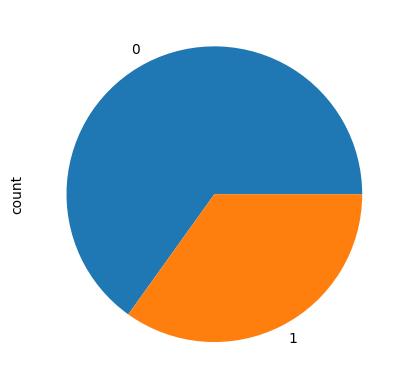

In [11]:
y.value_counts().plot(kind='pie')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
ssc=StandardScaler()
X_train=ssc.fit_transform(X_train)
X_test=ssc.fit_transform(X_test)

In [15]:
lr=logistic_reggression(0.0001, 10000)

In [16]:
lr.fit(X_train, y_train)

/var/folders/6b/6k4ds0_16px1y3dqf7yvt44m0000gn/T/ipykernel_15437/1723435888.py:2: RuntimeWarning: divide by zero encountered in log
  return 1/(1+np.log(-z))
/var/folders/6b/6k4ds0_16px1y3dqf7yvt44m0000gn/T/ipykernel_15437/1723435888.py:2: RuntimeWarning: invalid value encountered in log
  return 1/(1+np.log(-z))


In [17]:
y_hat=lr.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(y_hat, y_test)

0.7012987012987013

In [20]:
from sklearn.linear_model import LogisticRegression

In [33]:
lref=LogisticRegression(max_iter=100000)

In [34]:
lref.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [35]:
y_pred1=lref.predict(X_test)

In [36]:
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [37]:
accuracy_score(y_test, y_pred1)

0.8051948051948052